# Demo SSentiA_Sp model for PaperReview dataset

This problem is to design an automated model for sentiment analysis in Spanish with no labels. Specifically we test our apporach in PaperReview dataset, which comprises paper reviews sent to an international conference in Spanish. The corpus has a total of $382$ documents labeled by using a five-point scale, which indicates the opinion about the paper quality. We use a methodology to treat PaperReviews as a binary classification problem. Samples with rating one or two are considered as negatives reviews; similarly, documents with rating four or five are categorized as positive reviews. PaperReviews is publicy available (https://archive.ics.uci.edu/ml/datasets/Paper+Reviews). 

# Part 1. Load Python Packages

## 1.1 Install the required packages

In [1]:
!pip install pip setuptools wheel
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install deep-translator
!python -m pip install urllib3[secure]
!pip install spacytextblob
!pip install vaderSentiment
!python -m spacy download es_core_news_sm

     --------------------------------------- 13.9/13.9 MB 23.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


     --------------------------------------- 14.0/14.0 MB 23.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


## 1.2 Import packages

In [2]:
import pandas as pd
import numpy as np
import sys
import csv

sys.path.append('../Model')
from SSentiA_Sp import sSentiA_Sp
from urllib.request import urlopen
import json

# Part 2. Loading the data

## 2.1. download data

In [3]:
# store the URL in url as 
# parameter for urlopen
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00410/reviews.json"
  
# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
data = json.loads(response.read())

## 2.2 Process the data

Aiming to use our approach it is mandatory to extract the text and label from the raw data. We clarify that the labels are used only for validation purposes.

In [4]:
X = []
Y = []
for i in range(171):
    a = 0
    aux_ = 0
    while a==0:
        try: 
            if data['paper'][i]['review'][aux_]['lan'] == 'es':
                X.append(data['paper'][i]['review'][aux_]['text'])
                Y.append(int(data['paper'][i]['review'][aux_]['orientation']))
            aux_ += 1    
        except:
            a = 1
X, Y = np.array(X), np.array(Y)

## 2.3 Process the labels

Originally, such dataset configures a 5-class classification problem, we convert it into a binary problem as follows: First, we discard samples with label equal to zero. Moreover, samples with negative labels are assigned to negative class (0); on the other hand, samples with positive labels are categorized a positives (1)

In [5]:
X, Y = X[Y!=0], Y[Y!=0]
Y[Y>0] = 1
Y[Y<0] = 0
Y

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

# Part 3. Applying lexicon-based approaches to PaperReview dataset

## 3.1 Textblob lexicon

In [6]:
from LRsentiA_TextBlob import LexicalAnalyzer
r = LexicalAnalyzer('PaperReview')
predictions, pred_confidence_scores = r.classify_binary_dataset(X,Y)

Prediction ------
---- 0.6645 0.6062 0.634 0.5271


## 3.2 VADER lexicon

In [7]:
from LRsentiA_VADER import LexicalAnalyzer
r = LexicalAnalyzer('PaperReview')
predictions, pred_confidence_scores = r.classify_binary_dataset(X,Y)

Prediction ------
---- 0.6911 0.6611 0.6758 0.5993


## 3.3 Spanish lexicon

In [8]:
from LRSentiA_Spanish import LexicalAnalyzer
r = LexicalAnalyzer('PaperReview')
predictions, pred_confidence_scores = r.classify_binary_dataset(X,Y)

Prediction ------
---- 0.6382 0.6337 0.6359 0.5921


# Part 3. Our hybrid approach

Accordingly, in this work, we employ a self-supervised approach based on the Self-supervised Sentiment Analyzer for classification from unlabeled data--(SSentiA) . Such an approach generates pseudo-labels using a lexicon-based method; then, these labels are enhanced using a supervised classification scheme.

## 3.1 No labels

We first test our approach under the scenario of having no labels.

In [9]:
from LRsentiA_Sp import LexicalAnalyzer
r = LexicalAnalyzer('PaperReview')
predictions, pred_confidence_scores = r.classify_binary_dataset(X,Y)
df1, df2, df3, df4, df5 = r.distribute_predictions_into_bins(X,Y,predictions, pred_confidence_scores)

---- 0.6928 0.5988 0.6424 0.509
$$$$
0.5204280668857605 0.6977902646177716
Bin Threshold 0.6977902646177716 0.5204280668857604 0.34306586915374926 0.0001
---->>>  277 277


In [10]:
s = sSentiA_Sp()
s.apply_SSSentiA(df1, df2, df3, df4, df5)

--- 123
..
Bin-3 Results
Total:  0.6622 0.5536 0.603 0.375
..
Bin-4results
F1:  0.6543 0.5088 0.5724 0.3171
Bin 5 results
F1:  nan 0.5 nan 0.2812

Overall Predcition of SSSentiA
Overall:  0.7046 0.5526 0.6194 0.4477


## 3.2 Few labels

Finally, aiming to evaluate the behavior of our hybrid proposal in scenarios with limited labeled data, we carry out an additional experiment, where we vary the number of labels.

In [11]:
from supervisedalgorithm import Logistic_Regression_Classifier, SVM_Classifier

from supervisedalgorithm import  Performance
from supervisedalgorithm  import TF_IDF

from sklearn.model_selection import train_test_split
from random import randint

In [12]:
df = [df1, df2, df3, df4, df5]

X  = np.array([1])
Sc = np.array([1])
Y  = np.array([1]) #true labels
Z  = np.array([1])

for i in range(5):
    data = df[i]
    content = data.values
    X = np.concatenate((X, content[:,0]))
    Sc = np.concatenate((Sc, content[:,3]))
    Y = np.concatenate((Y, content[:,1]))
    Z = np.concatenate((Z, content[:,2]))

X, Sc, Y, Z = X[1:], Sc[1:], Y[1:], Z[1:]
Y = Y.astype('int')
Z = Z.astype('int')

P = np.arange(0.05,0.9,0.1)
N = len(P)
Cla = ['LR', 'SVM']
Data_1 = []
for cl in Cla:
    if cl == 'LR':
        ml_classifier = Logistic_Regression_Classifier() 
    else:
        ml_classifier = SVM_Classifier()
    mean_F1 = np.zeros(N)
    min_F1 = np.zeros(N)
    max_F1 = np.zeros(N)
    std_F1 = np.zeros(N)
    for j, p in enumerate(P):
        aux_F1 = np.zeros(5)
        for i in range(5):
            X_true, X_, _, Sc_, y_true, y_, _, Z_ = train_test_split(X, Sc, Y, Z, test_size=1-p, random_state=randint(100, 1000))
            X1, Y1, Z1, X2, Y2, Z2, X3, Y3, Z3, X4, Y4, Z4, X5, Y5, Z5 = LexicalAnalyzer('PaperReview').distribute_predictions_into_bins_1(X_, y_, Z_, Sc_)
            
            X1 = np.concatenate((X_true, X1))
            Y1 = np.concatenate((y_true, Y1))
            Z1 = np.concatenate((y_true, Z1))
            
            bin_size_1_2 = len(X1) + len(X2) # + len(X_3) #+  len(X_01) + len(X_02) + len( X_11) + len(X_12)
            print("---",bin_size_1_2)
            
            
            data = np.concatenate((X1,X2,X3), axis=None)
            label = np.concatenate((Z1,Z2,Y3), axis=None)
            
            tf_idf = TF_IDF()
            data = tf_idf.get_tf_idf(data)
            
            X_train = data[:bin_size_1_2]
            Y_train = label[:bin_size_1_2]
            
            X_test = data[bin_size_1_2:]
            Y_test = label[bin_size_1_2:]
            
            prediction_bin_3 = ml_classifier.predict(X_train, Y_train, X_test)
    
            print("Bin-3 Results")
            performance = Performance()
            _,precision,  recall, f1_score, acc = performance.get_results(Y_test, prediction_bin_3)
            print("Total: ", round(precision,4),  round(recall,4), round(f1_score,4),round(acc,4) )

            data = np.concatenate((X1,X2,X3,X4,X5), axis=None)
            label = np.concatenate((Z1,Z2,prediction_bin_3,Y4,Y5), axis=None)
            
            
            tf_idf = TF_IDF()
            data = tf_idf.get_tf_idf(data)
        
            bin_1_2_3_training_data = len(X1) + len(X2) + len(X3)  
            
            X_train = data[:bin_1_2_3_training_data]
            Y_train = label[:bin_1_2_3_training_data]
            
            X_test = data[bin_1_2_3_training_data:]
            Y_test = label[bin_1_2_3_training_data:]
    
 
            print("Bin-4results")
            prediction_bin_4_5 = ml_classifier.predict(X_train, Y_train, X_test)
            _,precision,  recall, f1_score, acc = performance.get_results(Y_test[:len(X4)], prediction_bin_4_5[:len(X4)])
            print("F1: ", round(precision,4),  round(recall,4), round(f1_score,4),round(acc,4) )
            aux_F1[i] = acc
            
        mean_F1[j] = np.mean(aux_F1)
        std_F1[j] = np.std(aux_F1)
        min_F1[j] = mean_F1[j] - 2*np.std(aux_F1)
        max_F1[j] = mean_F1[j] + 2*np.std(aux_F1)
        
    Data_ = np.concatenate((P.reshape(N,1), mean_F1.reshape(N,1), max_F1.reshape(N,1), min_F1.reshape(N,1)), axis=1)
    Dat = pd.DataFrame(Data_,columns =None, index=None)
    Data_1.append([P.reshape(N,1), mean_F1.reshape(N,1), std_F1.reshape(N,1)])
#     Name_ = cl + '_Paper.dat'
#     Dat.to_csv(Name_,index=False, header=False,sep = " ")

$$$$
0.5186562166440236 0.6966625167821521
Bin Threshold 0.6966625167821521 0.5186562166440236 0.34064991650589505 0.0001
---->>>  264 264
--- 130
..
Bin-3 Results
Total:  0.6618 0.5741 0.6148 0.3947
..
Bin-4results
F1:  0.6486 0.5273 0.5817 0.3247
$$$$
0.5245123975002045 0.7002313157331239
Bin Threshold 0.7002313157331239 0.5245123975002046 0.3487934792672852 0.0001
---->>>  264 264
--- 131
..
Bin-3 Results
Total:  0.6935 0.6607 0.6767 0.525
..
Bin-4results
F1:  0.6136 0.5546 0.5826 0.4026
$$$$
0.5128331045709118 0.6893408071500466
Bin Threshold 0.6893408071500466 0.5128331045709118 0.33632540199177685 0.0001
---->>>  264 264
--- 128
..
Bin-3 Results
Total:  0.6875 0.6154 0.6494 0.4737
..
Bin-4results
F1:  0.6603 0.5182 0.5807 0.3375
$$$$
0.5102567457445528 0.6875471814269243
Bin Threshold 0.6875471814269243 0.5102567457445528 0.33296631006218125 0.0001
---->>>  264 264
--- 126
..
Bin-3 Results
Total:  0.6967 0.5698 0.6269 0.4478
..
Bin-4results
F1:  0.62 0.525 0.5686 0.2692
$$$$
0.52

Bin-4results
F1:  0.8091 0.7237 0.764 0.8148
$$$$
0.5365726158420712 0.7150139169031262
Bin Threshold 0.7150139169031262 0.5365726158420712 0.3581313147810162 0.0001
---->>>  97 97
--- 222
..
Bin-3 Results
Total:  0.8231 0.7917 0.8071 0.8333
..
Bin-4results
F1:  0.6136 0.5694 0.5907 0.6923
$$$$
0.5763447120965921 0.7453192197970535
Bin Threshold 0.7453192197970535 0.5763447120965921 0.4073702043961307 0.0001
---->>>  70 70
--- 242
..
Bin-3 Results
Total:  0.6667 0.9 0.766 0.8182
..
Bin-4results
F1:  0.7083 0.6282 0.6659 0.7368
$$$$
0.503705483052011 0.6799895940840932
Bin Threshold 0.6799895940840932 0.5037054830520109 0.3274213720199287 0.0001
---->>>  70 70
--- 239
..
Bin-3 Results
Total:  0.6429 0.6458 0.6443 0.6429
..
Bin-4results
F1:  0.875 0.9615 0.9162 0.9375
$$$$
0.5074872164651602 0.6886089839864017
Bin Threshold 0.6886089839864017 0.5074872164651602 0.32636544894391867 0.0001
---->>>  70 70
--- 238
..
Bin-3 Results
Total:  0.4712 0.475 0.4731 0.5882
..
Bin-4results
F1:  0.638

Bin-4results
F1:  0.6236 0.6293 0.6265 0.6829
$$$$
0.5290940776781242 0.7114650816660416
Bin Threshold 0.7114650816660416 0.5290940776781242 0.3467230736902069 0.0001
---->>>  153 153
--- 197
..
Bin-3 Results
Total:  0.6222 0.641 0.6315 0.6316
..
Bin-4results
F1:  0.6273 0.6273 0.6273 0.7073
$$$$
0.5265054938945549 0.7058586912307858
Bin Threshold 0.7058586912307858 0.5265054938945549 0.34715229655832397 0.0001
---->>>  153 153
--- 195
..
Bin-3 Results
Total:  0.7727 0.7917 0.7821 0.7222
..
Bin-4results
F1:  0.5925 0.6018 0.5971 0.5745
$$$$
0.5145337938351268 0.6905548210789618
Bin Threshold 0.6905548210789618 0.5145337938351269 0.3385127665912918 0.0001
---->>>  125 125
--- 205
..
Bin-3 Results
Total:  0.7738 0.7738 0.7738 0.7895
..
Bin-4results
F1:  0.7256 0.7147 0.7201 0.7632
$$$$
0.5328581870202008 0.7137334037237827
Bin Threshold 0.7137334037237827 0.5328581870202008 0.351982970316619 0.0001
---->>>  125 125
--- 208
..
Bin-3 Results
Total:  0.9615 0.9 0.9298 0.9412
..
Bin-4results

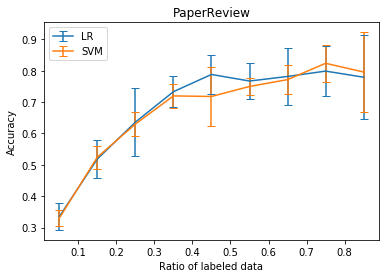

In [13]:
import matplotlib.pyplot as plt
for i in range(2):
    plt.errorbar(Data_1[i][0].flatten(), Data_1[i][1].flatten(), yerr=Data_1[i][2].flatten(),capsize=4)
plt.legend(['LR', 'SVM'])
plt.title('PaperReview')
plt.ylabel('Accuracy')
plt.xlabel('Ratio of labeled data')
plt.show()